### <p style="text-align: right;"> &#9989; Jacob Jensen

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image001.png"
     alt="CMSE Grapical Image"
     style="float: right; margin-right: 10px;" 
     height="164" 
     width="164" />
# __CMSE  201 - Fall 2019__
    

# Homework 5: Working with data using Pandas and Fitting data with a model

## Goals

### By the end of the homework assignment you will have practiced:

1. Reading and visualizing data with Pandas
2. Fitting data using `curve_fit` and `polyfit`
3. Analyzing gene expression data from different tissues or cell-types, explore their relationships

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, November 8th.** It should be uploaded into the "Homework Assignments" submission folder for Homework #5.  Submission instructions can be found at the end of the notebook.

## Grading

* Exploring the gene expression data (**22 points**)
    - Loading and inspecting the data (3 points)
    - Determining the maximum expression values and which genes (4 points)
    - Determining the maximum difference of gene expressions across two tissues and which genes (4 points)
    - Finding median values in each tissue (4 points)
    - Visualizing tissue-specific gene expressions using boxplot (3 points)
    - Looking for correlation of gene expression between normal and cancer cells (4 points)
* Modeling gene expression values in cancer cells using normal cells (**18 points**)
    - Modeling gene expression in cancer cells as a function of their values from normal cells using `curve_fit` (9 points)
    - Modeling gene expression in cancer cells as a function of their values from normal cells using `polyfit` (9 points)
    
**Total**: 40 points

---
## Part 1: Exploring the gene expression data (18 points total)

### Loading and inspecting the data (3 points)

The whole genome of human (~3 billion DNA characters) is composed with around 20,000 genes. Genes can produce proteins, which are the basic bulding blocks of our life. The activity of a gene is called gene expression. The expression level of a specific gene can vary a lot in different tissues or cell types, and that's why we have diverse types of cells in our body, from the starting point of stem cells to a variety of highly differentiated cells (e.g. heart, liver, skin etc). 

For example, neuron cells are quite different from muscle cells, because genes that show high expression levels in neuron are different from genes that show high expression levels in muscle. In the meantime, some related cell-types may have similar gene expression profiles, such as T cells and B cells in the immune system. In summary, quatitative characterization of expression levels of the ~20k genes can help us to compare different cell-types or tissues, and can also help us to understand what's going on in different cell types along the whole human genome.

Using the provided dataset, `gene_expression.csv`, you're going to explore how the gene expression levels differ or correlate across different cell-types.

To get started, you should include import commands for `pyplot`, `numpy`, and `pandas`. Don't forget to include the command for making sure any plots you create will show up in your notebook!

In [2]:
# Put import commands here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Then, you should make sure to **read in the gene expression data file as a Pandas dataframe.**

In [3]:
# Read in the gene expression data here'
geneExp = pd.read_csv("gene_expression.csv")


Now, **write some code to inspect the properties of the data and then answer the following questions** (you should put each of your commands in separate cells to get them to display properly):

* Use a command to look at the first **10** lines of data
* Use a command to look at summary statistics (like the count, min, max, and mean) for columns with continuous data
* What are the names of the columns?
* How many rows are in this dataset? (Each row in the file corresponds to a specific gene.)

In [4]:
# Put your code here
geneExp.head(10)

,gene_id,H1_Cell_Line,CD4_Memory_Primary_Cells,CD4_Naive_Primary_Cells,Adult_Liver,HepG2_Hepatocellular_Carcinoma
0,ENSG00000000003,43,0,1,73,49
1,ENSG00000000419,35,45,47,52,62
2,ENSG00000000457,2,7,8,4,2
3,ENSG00000000460,6,3,3,0,3
4,ENSG00000000938,0,3,3,4,0
5,ENSG00000000971,0,4,0,566,0
6,ENSG00000001036,49,4,3,43,74
7,ENSG00000001084,6,5,4,25,10
8,ENSG00000001167,13,24,29,6,10
9,ENSG00000001461,2,13,16,1,3


In [5]:
geneExp.describe()

,H1_Cell_Line,CD4_Memory_Primary_Cells,CD4_Naive_Primary_Cells,Adult_Liver,HepG2_Hepatocellular_Carcinoma
count,19003.000000,19003.000000,19003.000000,19003.000000,19003.000000
mean,14.824396,15.797400,16.479556,45.610956,19.632900
std,36.241348,73.704173,84.814123,920.955044,179.088747
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.000000,5.000000,3.000000,4.000000
75%,15.000000,16.000000,17.000000,12.000000,14.000000
max,1183.000000,8218.000000,9983.000000,102156.000000,16876.000000


In [6]:
geneExp

,gene_id,H1_Cell_Line,CD4_Memory_Primary_Cells,CD4_Naive_Primary_Cells,Adult_Liver,HepG2_Hepatocellular_Carcinoma
0,ENSG00000000003,43,0,1,73,49
1,ENSG00000000419,35,45,47,52,62
2,ENSG00000000457,2,7,8,4,2
3,ENSG00000000460,6,3,3,0,3
4,ENSG00000000938,0,3,3,4,0
...,...,...,...,...,...,...
18998,ENSG00000259716,0,0,0,0,0
18999,ENSG00000259729,0,8,6,0,2
19000,ENSG00000259736,0,8,13,0,0
19001,ENSG00000259753,0,0,1,0,0


The column names are "gene_id", "H1_Cell_Line", "CD4_Memory_Primary_Cells", "CD4_Naive_Primary_Cells", "Adult_Liver", and "HepG2_Hepatocellular_Carcinoma". There are 19003 rows. 

### Determining the maximum expression values and which genes

We'll start off out our exploration of gene expression data by figuring out which gene has the maximum expression in a specific cell-type.

The Pandas dataframe you just created should have four columns, which are:
       
* **'gene_id'**: the name of genes
* **'H1_Cell_Line'**: gene expression levels in H1 cell (one kind of stem cells)
* **'CD4_Memory_Primary_Cells'**: gene expression levels in CD4 Memory cells (one kind of T cells).
* **'CD4_Naive_Primary_Cells'**: gene expression levels in CD4 Naive cells (the other kind of T cells).
* **'Adult_Liver'**: gene expression levels in normal adult liver cells.
* **'HepG2_Hepatocellular_Carcinoma'**: gene expression levels in  HepG2 cancer cells (one kind of liver cancer cells).

Below, print out statements answering the following questions using masking techniques that you have learned:

1) **Which gene has the maximum expression level in CD4 Memory Primary cells, and what is the expression level of that gene in CD4 Naive Primary cells?** One ways to accomplish this is through the use of masks. **(4 points)**


In [7]:
# Put your code here
geneExp [ geneExp['CD4_Memory_Primary_Cells'] == geneExp['CD4_Memory_Primary_Cells'].max() ]


,gene_id,H1_Cell_Line,CD4_Memory_Primary_Cells,CD4_Naive_Primary_Cells,Adult_Liver,HepG2_Hepatocellular_Carcinoma
17964,ENSG00000248272,0,8218,9983,0,3


Gene ENSG00000248272 has max expression in CD4 Memory Primary Cells.  The expression of ENSG00000248272 in CD4 Naive Primary cells is 9983. 

2) **Compare the gene expression levels in HepG2 and Adult liver. What is the maximum of the difference between gene expression in HepG2 and that of Adult liver (i.e. HepG2 - Adult_liver)? And which gene has the maximum difference?  (4 points)**

In [9]:
# Put your code here
diffHepLiv = geneExp['HepG2_Hepatocellular_Carcinoma'] - geneExp['Adult_Liver'] 

maxDiff = diffHepLiv[ diffHepLiv == diffHepLiv.max() ]

maxDiffRow = maxDiff.index

print('The difference is {}'.format(maxDiff.iloc[0]))

geneExp.iloc[maxDiffRow,:]



The difference is 13266


,gene_id,H1_Cell_Line,CD4_Memory_Primary_Cells,CD4_Naive_Primary_Cells,Adult_Liver,HepG2_Hepatocellular_Carcinoma
7451,ENSG00000145192,0,0,0,3610,16876


The max difference 13266 and the gene that is accounting for this difference is ENSG00000145192.

### Finding median gene expression values for each cell-type/tissue (4 points)

1) You want to know if the overall gene expression levels are changing in different cell-types or tissue. **Print out the median values of gene expression for each cell-type/tissue separately.**

2) In addition, you want to focus on the **subset of genes that have non-zero expression in H1 cells**, i.e. the genes that have early expression in the stem cells, and check their expression levels in a later stage of differentiation (e.g. T cells, liver cells, cancer cells). **Print out the median expression values of this _subset_ of genes for each cell-type/tissue separately.** That is, find the median value for each cell-type/tissue where the expression of H1 cells is greater than zero.


In [10]:
# Put your code here
geneExp.describe()
columnLis = geneExp.columns[1:]

for column in columnLis:
    print('The median gene expression of the cell type {} is {}'.format(column, np.median(geneExp[column])))
    
geneH1Exp = geneExp[ geneExp['H1_Cell_Line'] != 0 ]
print('\n\n')

for column in columnLis:
    print('The median gene expression of genes with non-zero expression in H1 of the cell type {} is {},'.format(column, np.median(geneH1Exp[column])))

The median gene expression of the cell type H1_Cell_Line is 4.0
The median gene expression of the cell type CD4_Memory_Primary_Cells is 5.0
The median gene expression of the cell type CD4_Naive_Primary_Cells is 5.0
The median gene expression of the cell type Adult_Liver is 3.0
The median gene expression of the cell type HepG2_Hepatocellular_Carcinoma is 4.0



The median gene expression of genes with non-zero expression in H1 of the cell type H1_Cell_Line is 9.0,
The median gene expression of genes with non-zero expression in H1 of the cell type CD4_Memory_Primary_Cells is 8.0,
The median gene expression of genes with non-zero expression in H1 of the cell type CD4_Naive_Primary_Cells is 8.0,
The median gene expression of genes with non-zero expression in H1 of the cell type Adult_Liver is 5.0,
The median gene expression of genes with non-zero expression in H1 of the cell type HepG2_Hepatocellular_Carcinoma is 8.0,


### Visualizing differences of expression by grouping genes (3 points)

Now that you understand a bit about the overall trends in the gene expression data, you want to make a comparison of expression for different groups of genes. 
  - The first group are genes whose expression in normal adult liver are smaller than or equal to 100
  - The second group are genes whose expression in normal adult liver are bigger than 100.

And you want to compare the expression levels in **HepG2** cells for these two groups of genes.

To do this, **create a new column in the data frame. Each element in the new column should be a boolean (True/False) value, indicating whether the gene belongs to the _first group_ or not.**

**Then make a boxplot comparing the distributions of HepG2 expression values for the 2 groups of genes, where the x-axis is gene group (True/False category) and the y-axis is gene expression for HepG2.**

Your plot should:

1. include axis labels
2. have a title
3. use the seaborn plot style (you need to import the package and then "set" the style)
4. set the y-axis range between 0 and 500


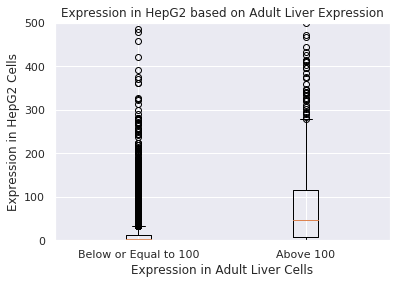

In [35]:
# Put your code here

import seaborn as sns
sns.set()

group1 = geneExp[ geneExp['Adult_Liver'] <= 100 ] 
group2 = geneExp[ geneExp['Adult_Liver'] > 100 ] 

geneGroupLabels = ['Below or Equal to 100', 'Above 100']

plt.boxplot([group1['HepG2_Hepatocellular_Carcinoma'], group2['HepG2_Hepatocellular_Carcinoma']], labels = geneGroupLabels)
plt.title('Expression in HepG2 based on Adult Liver Expression')
plt.ylabel('Expression in HepG2 Cells')
plt.xlabel('Expression in Adult Liver Cells')

plt.ylim(0, 500)
plt.show()


**Question**: For a set of data points, what's the meaning of 75% quantile? And how is it visualized in the boxplot?

The 75% quantile is the value at the 75% mark when the data is ordered from descending to ascending values. It is halfway between the median and max value. The box plot visualizes this with the highest horizontal bar. 

### Looking for correlation in gene expression between normal adult liver cells and HepG2 cancer cells (4 points)

You wonder if the genes with high expression levels in normal liver cells still have high expression levels in liver cancer cells. More generally, you want to check whether gene expression in normal liver cells is **correlated** with the expression in liver cancer cells.

Your task below is to:

**1. Using masks, create a new data frame where you remove the rows (i.e. genes) whose Adult_Liver value is 0 *or* HepG2 value is 0. In order words, you only want to focus on the subset of genes whose expression is non-zero in both normal adult liver and HepG2 cancer cells.**

**2. Using seaborn jointplot to visualize the relationship of gene expression between normal adult liver and cancer HepG2 cells,based on the new data frame.**

**3. Do the same thing as in 2, but this time plot the `np.log2` value of the gene expressions for both x-axis and y-axis.**

*Put your answer here.*

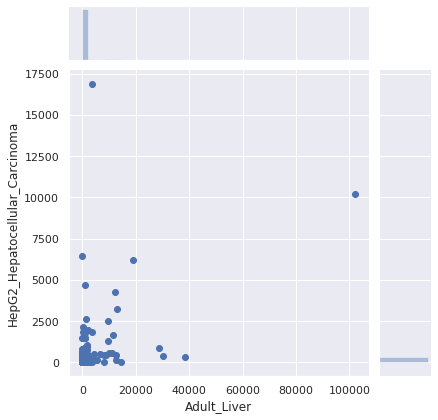

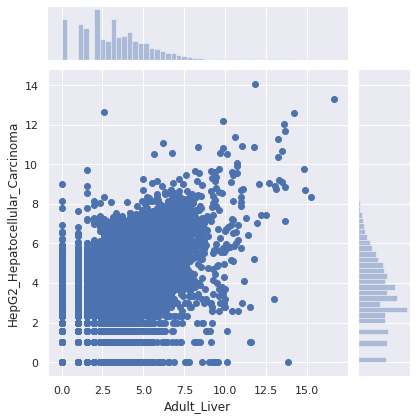

In [50]:
### Put your code here
geneExpRemoved = geneExp[ geneExp['Adult_Liver'] != 0 ]

geneExpRemoved = geneExpRemoved[ geneExpRemoved['HepG2_Hepatocellular_Carcinoma'] != 0 ] 

sns.jointplot(geneExpRemoved['Adult_Liver'], geneExpRemoved['HepG2_Hepatocellular_Carcinoma'] )

plt.show()

liverLogVal = np.log2(geneExpRemoved['Adult_Liver'])
hepLogVal = np.log2(geneExpRemoved['HepG2_Hepatocellular_Carcinoma'])

sns.jointplot(liverLogVal, hepLogVal)

plt.show()



**Question**: Correlation is the relationship between two variables: for example, when one variable increases in value, the other increases as well (positive correlation) or when one variable increases in value the other decreases (negative correlation). Variability is how spread the data is or how clustered.

Do you think that gene expression between the two cell types is correlated? Positive or negative? How variable is the data?  What can you learn from your graph?

Yes, positive correlation. The data is decently variable as it does not form a neat line when plotted against one another. There exists extreme gene expression in HepG2 cells of certain genes.

**Question**: What's the major difference between the `log2`-transformed plot and the plot based on the original values? 

The log2 graph is now in a logarithmic scale as compared to the raw data which is in a linear scale. Also, the log2 graph shows a stronger positive correlation as compared to the raw data graph. 

---
## Part 2: Modeling gene expression across cell types (**18 points total**)

In this part of the assignment, you'll practice fitting a model to data, much like we did in class with the presidential approval ratings data and the weather data. You will use both `curvefit` and  `polyfit` functions.

In [51]:
# RUN THIS CELL! You'll be using curve_fit for this section of the assignment
from scipy.optimize import curve_fit

### Modeling gene expression across different cell types by `curve_fit` (9 points)

Based on the pattern you observed from previous sections in this homework, you wonder if gene expressions in one cell type can be modeled or predicted by expression values in another cell type. 

You set out to create a linear model predicting gene expression in HepG2 liver cancer cells as a function of gene expression in normal adult liver cells using `curve_fit`. Your first step is to define a linear function, called "test_func", that is a linear model. Recall that linear models take the form of $y = m*x + b$, where $y$ is HepG2 gene expression, $x$ is normal adult liver gene expression, $m$ is the slope, and $b$ the intercept.

Define your function `test_func` so that the inputs are `expression`, `m`, and `b`. It should return `expression`*`m` + `b`

In [52]:
# Define your linear function, "test_func", here:
def test_func(expression, m, b):
    return expression*m + b

Our next step is to use Scipy's `curve_fit` function to estimate our parameter values. You should review the documentation for `curve_fit`, which you can find [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

We will use the **subset data frame from the previous section**, where each gene has non-zero expression values in both normal adult liver and HepG2 cancer cells. And we will use the **log2-transformed** values for normal adult liver and HepG2 cells.

We can use the log2-transformed "Adult_Liver" column from our dataset as the "x" values for the function, and the log2-transformed "HepG2_Hepatocellular_Carcinoma" column as our "y" values. **Use curve_fit to estimate the values of the parameters in the model: $m$ and $b$; and print out the values!** Make sure you include the right import command so that you can use curve_fit!

Once you have your estimated parameter values, **use them to compute the expected values of gene expression in HepG2 cancer cells (log2-transformed) for the range of gene expression spanned in the normal adult liver data (log2-transformed).**

Note again, we will only use the **new subset dataframe** created in the previous section which only contain genes that have non-zero expression values in both normal adult livver and HepG2 cancer cells.


In [58]:
# Call the curve_fit function here
pCoeff, pCov = curve_fit(test_func, liverLogVal, hepLogVal)
m = pCoeff[0]
b = pCoeff[1]
print('m: {:.3f}\nb: {:.3f}'.format(m,b))
# Use your function and fitted parameter values to get the expected values

hepLogValExp = test_func(liverLogVal, m, b)


m: 0.488
b: 1.959


Now that you've used curve_fit to estimate the parameter values and compute the expected values for HepG2 gene expression values, **plot the actual data and overplot the model values in the cell below.** Make sure you include appropriate labels! Additionally, be sure to plot the actual data and predicted data in contrasting colors that are visible! Remember to use `alpha` argument in the `scatter()` function to help with overplotting and visualization (`alpha=0.1` is a good place to start).

Note: both the actual and the predicted values should be log2-transformed data.



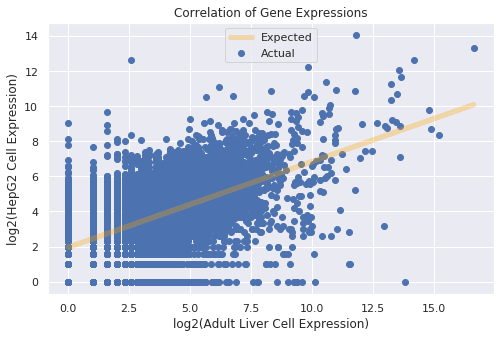

In [72]:
plt.figure(figsize=(8,5))

# Put your code here
plt.scatter(liverLogVal, hepLogVal, label = 'Actual')
plt.plot(liverLogVal, hepLogValExp, label = 'Expected', alpha = 0.3, linewidth = 5, color = 'orange')
plt.legend()
plt.ylabel('log2(HepG2 Cell Expression)')
plt.xlabel('log2(Adult Liver Cell Expression)')
plt.title('Correlation of Gene Expressions')
plt.show()

**Question**: Do you think a linear model is appropriate for this data? What do you think about the "fit" of the data to your model?

It's pretty good considering how much noise the data has. The overall fit isn't the best but using a higher order polynomial may not be suitable either as the amount of noise could really affect how the curve is fitted. 

### Modeling gene expression across different cell types by `polyfit` (9 points)

You doubt that a linear model is appropriate for modeling HepG2 gene expression as a function of normal liver gene expression. You decide that you'll fit a polynomial function, using the functions `polyfit` (to estimate parameters) and `poly1d` (to create a function to model predicted results).

In the cell below: 

**1) estimate polynomial parameters (you must decide on the order of the polynomial function) using `polyfit` for log2-transformed HepG2 gene expression and Adult Liver gene expression**

**2) create a function with these parameters using `poly1d` to create expected values for HepG2 gene expression for the range spanned by the minimum and maximum values of normal adult liver gene expression in the dataset**

**3) plot out the actual data along with the modeled data values in contrasting colors.**

**4) print out the parameter values**


<Figure size 432x288 with 0 Axes>

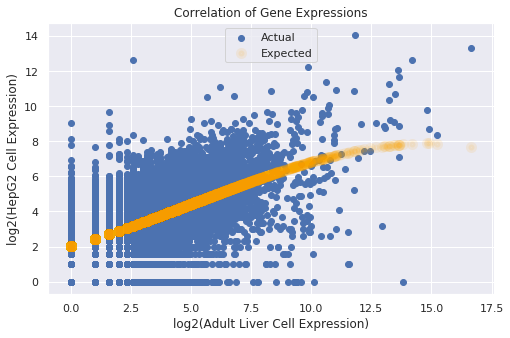

In [99]:
### Put your code here
pfit = np.polyfit(liverLogVal, hepLogVal, 3)
expFunc = np.poly1d(pfit)

hepLogValExp = expFunc(liverLogVal)

plt.clf()
plt.figure(figsize=(8,5))

plt.scatter(liverLogVal, hepLogVal, label = 'Actual')
plt.scatter(liverLogVal, hepLogValExp, label = 'Expected', alpha = 0.1, linewidth = 5, color = 'orange')
plt.legend()
plt.ylabel('log2(HepG2 Cell Expression)')
plt.xlabel('log2(Adult Liver Cell Expression)')
plt.title('Correlation of Gene Expressions')
plt.show()


In the cell below, explain which model you'd prefer to predict HepG2 gene expression, linear vs. higher-order?

Linear as the amount of noise and randomness in the data makes it difficult to implement a higher order function that is usable.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  

In [100]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/N3CzCAyYKNE5s6rr6" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the submission link for Homework #5, and upload it there.